In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Datensatz laden

In [2]:
dataset = pd.read_csv('../data/mushrooms.csv', delimiter=',')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Labelverteilung analysieren

In [4]:
dataset['class'].value_counts()/len(dataset)

e    0.517971
p    0.482029
Name: class, dtype: float64

([<matplotlib.patches.Wedge at 0x7f7ab75dd9d0>,
 [Text(-0.06207025934044508, 1.0982473687222793, 'edible'),
  Text(0.062070156515105133, -1.0982473745337116, 'poisonous')])

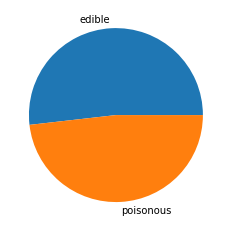

In [5]:
sizes = [0.517971, 0.482029]
labels = 'edible','poisonous'
plt.pie(sizes,labels=labels)

# Merkmale in Abhängigkeit zur Klasse analysieren

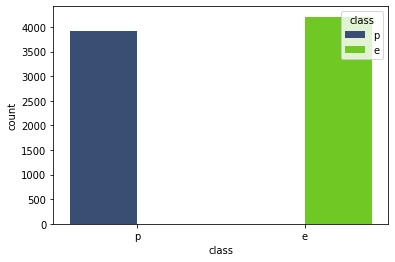

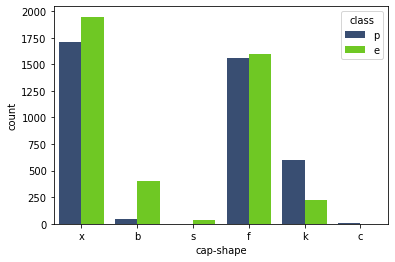

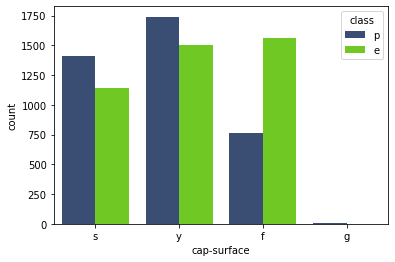

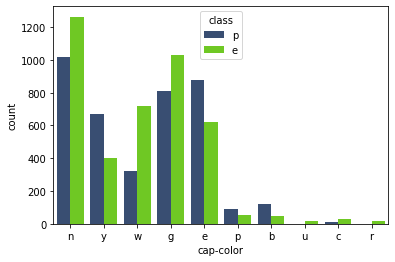

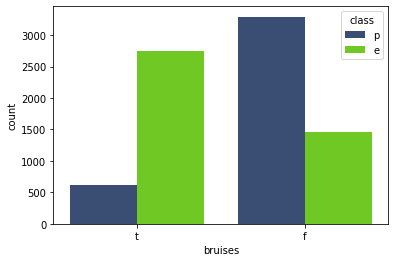

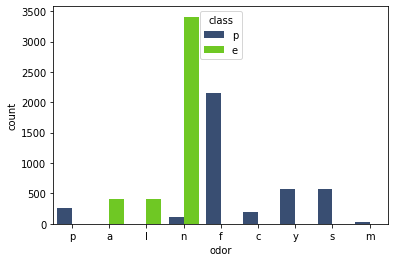

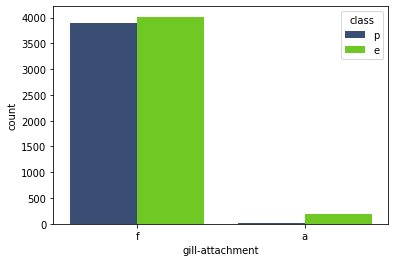

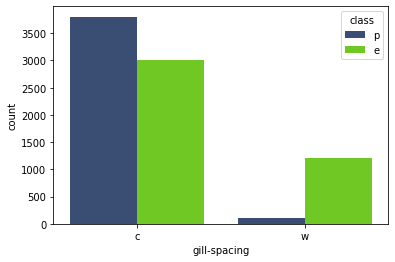

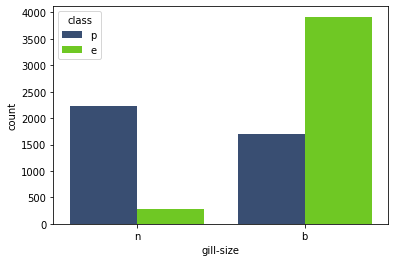

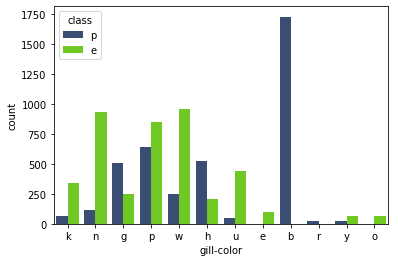

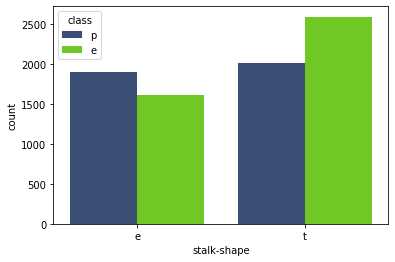

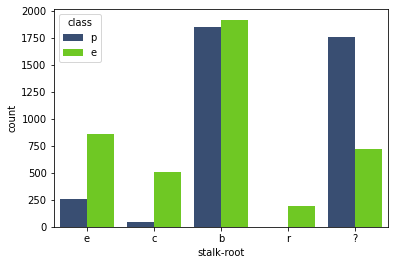

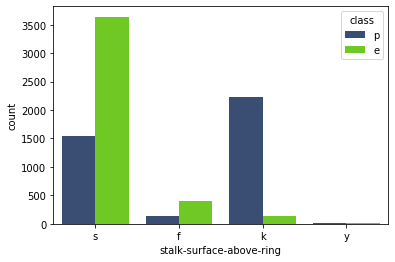

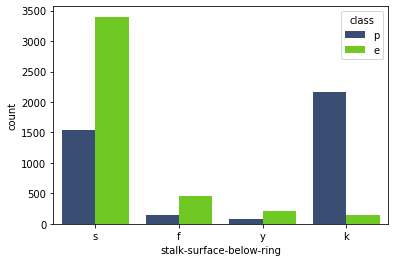

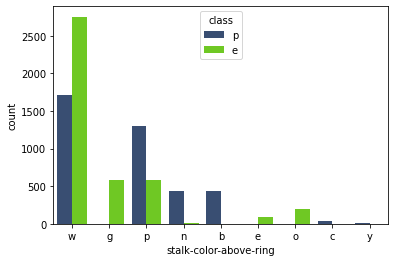

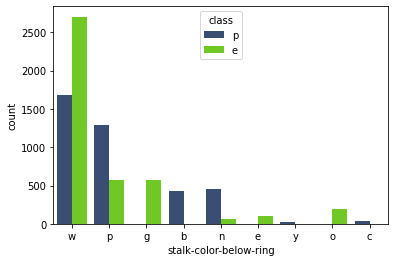

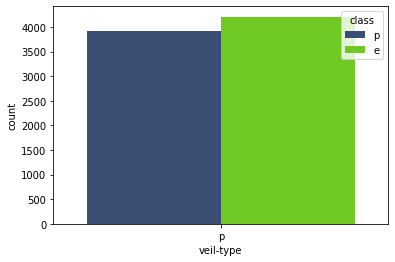

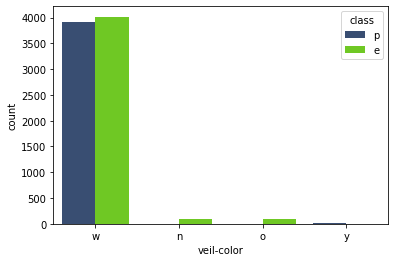

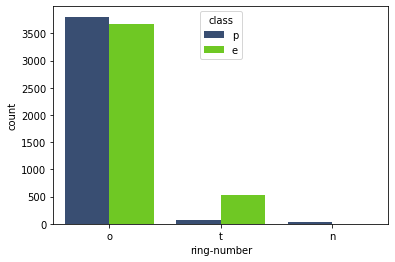

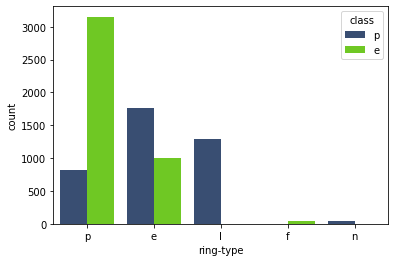

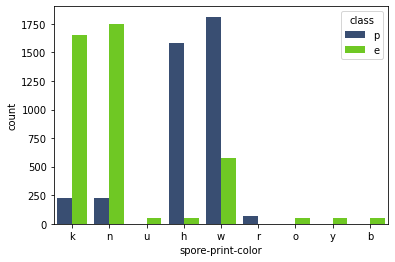

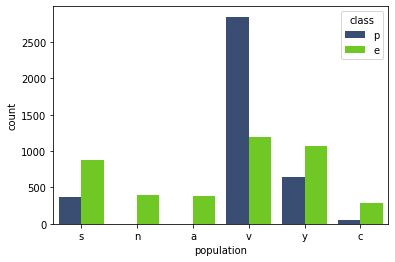

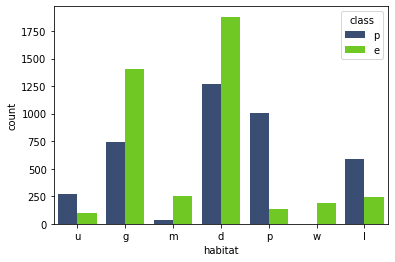

In [6]:
for i in dataset.columns:
    sns.countplot(x=i, hue ="class", data=dataset, palette=['#2f4b7c', '#6de309'])
    plt.show()

# Merkmalsausprägungen analysieren

In [7]:
dataset.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [ ]:
dataset.isnull().sum()

# Korrelationen in den Merkmalen

In [8]:
encoder = LabelEncoder()
for col in dataset.columns:
    dataset[col] = encoder.fit_transform(dataset[col])

In [9]:
y= dataset['class']
x= dataset.drop(['class'], axis=1)

<AxesSubplot:>

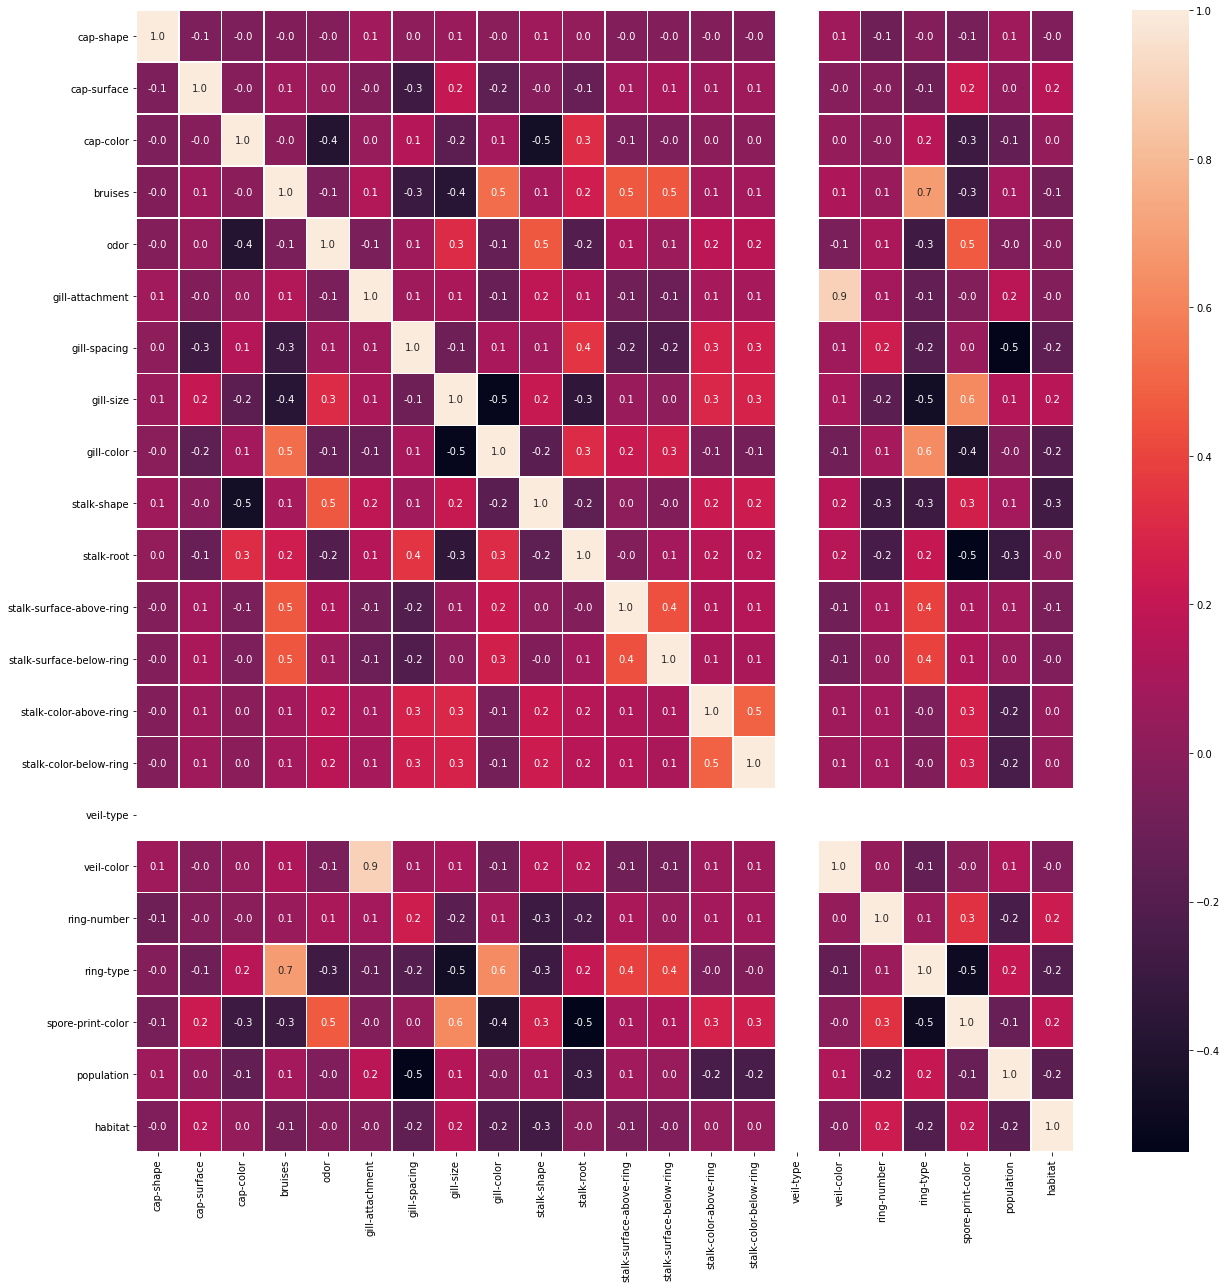

In [10]:
plt.subplots(figsize=(21,21))
sns.heatmap(x.corr(), annot=True, linewidths =0.5, fmt= '.1f')

## Entfernen von Veil-type und erneutes plotten

In [11]:
x = x.drop(['veil-type'], axis = 1)

<AxesSubplot:>

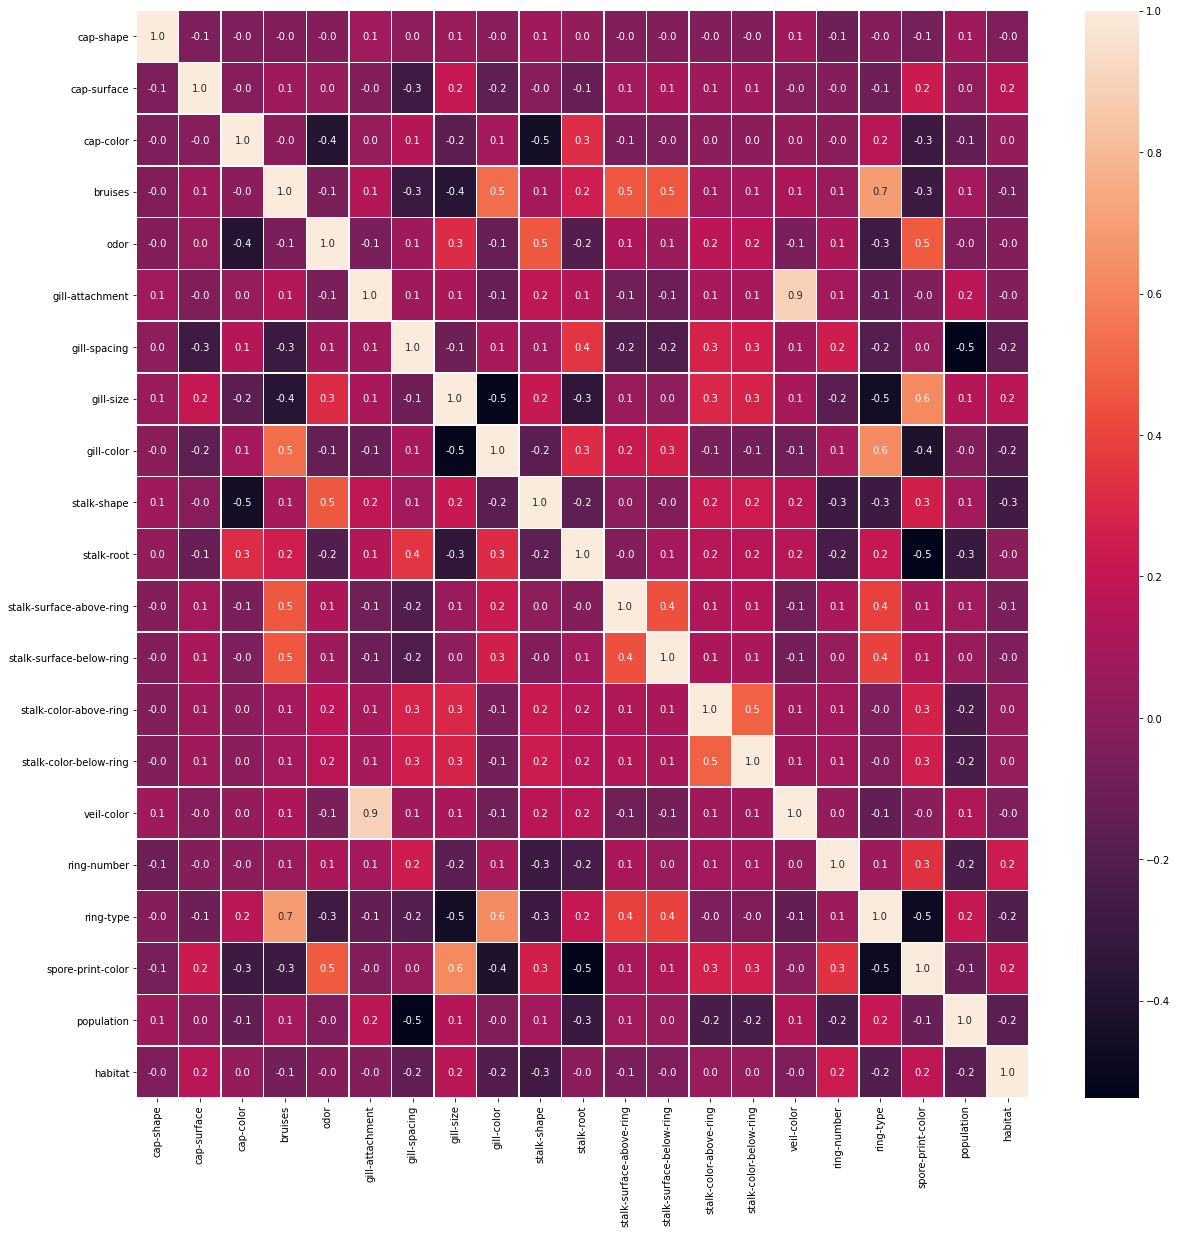

In [12]:
plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(), annot=True, linewidths =0.5, fmt= '.1f')

#  Feature Selection mit RandomForest

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state= 42)
clf = RandomForestClassifier()
rfecv = RFECV(estimator=clf, step =1 , cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features : ', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features :  7
Best features : Index(['odor', 'gill-size', 'gill-color', 'stalk-root', 'ring-type',
       'spore-print-color', 'population'],
      dtype='object')
